In [1]:
import sys
sys.executable

'C:\\Users\\eliza\\anaconda3\\python.exe'

In [2]:
import tensorflow as tf
import keras
from keras import datasets
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.regularizers import l2
from collections import Counter
from matplotlib.lines import Line2D
import plotly.express as px


from keras import layers
from keras import regularizers

from keras.models import model_from_json

from IPython.display import clear_output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import matplotlib.image as mpimg
import glob
from os import listdir
from os.path import isfile, join
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import seaborn as sns
import datetime
import statistics as st
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib.ticker import MaxNLocator

import pickle
import sklearn as skl

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
from sklearn.decomposition import PCA

In [3]:
def take_median_column(arr):
    time_range=arr.shape[1]
    med = math.floor(time_range/2)
    
    col = arr[:, med]
    return col

In [4]:
mypath='C:/Users/eliza/Desktop/git_folder/ML_For_SKR_Code/ML_Dataset/Uninterpolated_Flux_Arrays'
fl_labels=[f for f in listdir(mypath) if isfile(join(mypath, f))]
fl_files = ['C:/Users/eliza/Desktop/git_folder/ML_For_SKR_Code/ML_Dataset/Uninterpolated_Flux_Arrays/'+f for f in fl_labels]
fl_list =[np.load(i, allow_pickle=True) for i in fl_files]

median_of_arrays = np.array(list(map(take_median_column, fl_list)))


arrays_for_pca = pd.DataFrame(median_of_arrays)

In [5]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(arrays_for_pca)

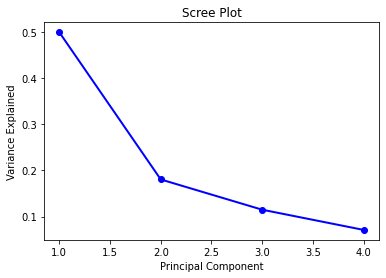

In [6]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [13]:
ttl_labels =list(pd.read_excel('C:/Users/eliza/Desktop/git_folder/ML_For_SKR_Code/ML_Dataset/ML_LFE_Info.xlsx')['Note'])

#Remove LFE_dg label  if needs be.
ttl_labels=['LFE' if x == 'LFE_m' else x for x in ttl_labels]
ttl_labels=['LFE' if x == 'LFE_ext' else x for x in ttl_labels]
ttl_labels=['LFE' if x == 'LFE_sp' else x for x in ttl_labels]
ttl_labels=['LFE' if x == 'LFE_dg' else x for x in ttl_labels]
ttl_labels=['LFE' if x == 'LFE_sm' else x for x in ttl_labels]
ttl_labels=['NOLFE' if x == 'NoLFE' else x for x in ttl_labels]
print(np.unique(ttl_labels))
total_data_labels=list(pd.Categorical(pd.factorize(ttl_labels)[0]))
print(np.unique(total_data_labels))

['LFE' 'NOLFE']
[0 1]


### Biplot

In [14]:
pca_df = pd.DataFrame({'PC1': principalComponents[:,0], 'PC2': principalComponents[:,1], 'labels':ttl_labels})

In [15]:
fig = px.scatter(pca_df, x="PC1", y="PC2", color="labels", symbol="labels",
          labels={"labels"})
fig.update_traces(marker={'size': 5})
fig.update_xaxes(range=[-2e-19, 2e-19])
#fig.update_xaxes(type='log')
fig.update_yaxes(type='log')
fig.show()

### Eigenvectors

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]


Text(0.5, 1.0, 'Heatmap of the Eigenvectors for each Principal Component')

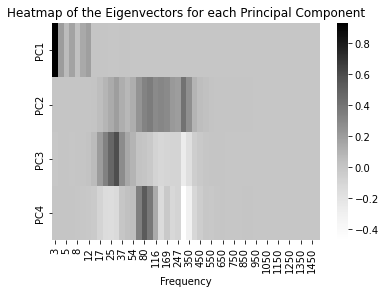

In [25]:
eigenvecs = pca.components_

#freq_arr = 10**(np.arange(np.log10(3.9548001), np.log10(1500), (np.log10(1500)-np.log10(3.9548001))/399, dtype=float))

ax = sns.heatmap(eigenvecs, cmap='Greys')
frequency_tmp = np.load('C:/Users/eliza/Desktop/git_folder/ML_For_SKR_Code/ML_Dataset/frequency_tmp.npy',allow_pickle=True)
   
locs = np.arange(0, 48, 2)
print(locs)
labelz = frequency_tmp[locs]
labelz = [math.floor(i) for i in labelz]
ax.set_xticklabels(labelz)
ax.set_yticklabels(['PC1', 'PC2', 'PC3','PC4'])
ax.set_xlabel('Frequency')
ax.set_title('Heatmap of the Eigenvectors for each Principal Component')